In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# Step 1: Read the CSV file
file_path = '/content/drive/My Drive/w1810216_FYP_20200351_UAPSithmini/w1810216_transformer_model/data.csv'
df = pd.read_csv(file_path)

# Use the correct column name to drop (e.g., 'id' if the column name is 'id')
df = df.drop('id', axis=1)

Mounted at /content/drive


In [2]:
# Check for null values in the DataFrame
print(df.isnull().sum())

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64


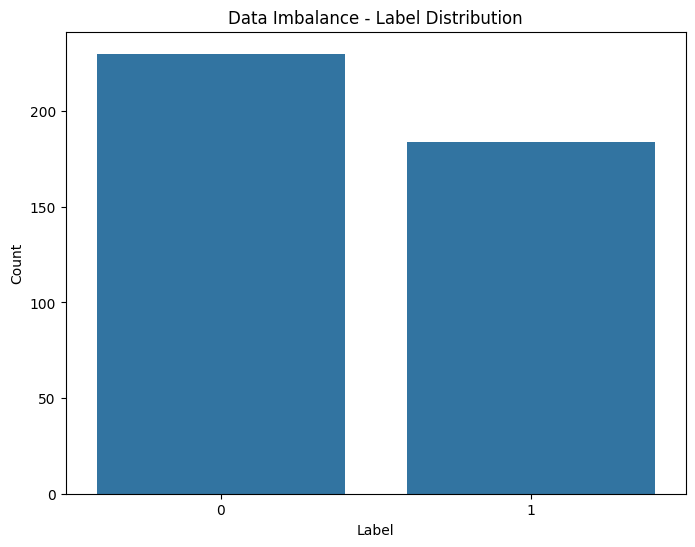

target
0    230
1    184
Name: count, dtype: int64


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'target' is the column containing the target variable
label_counts = df['target'].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df) # Changed 'label' to 'target'
plt.title('Data Imbalance - Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

print(label_counts)

In [4]:
from sklearn.preprocessing import StandardScaler

# Select the numerical columns to scale
numerical_cols = ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the numerical columns and transform the data
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

from sklearn.model_selection import train_test_split

# Step 4: Split the dataset into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report

def create_transformer_model(input_dim):
    inputs = keras.Input(shape=(input_dim,))

    # Reshape input to add sequence dimension (assuming single sequence step)
    x = layers.Reshape((1, input_dim))(inputs)

    # Transformer Block 1
    attention_output = layers.MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
    x = layers.Add()([x, attention_output])
    x = layers.LayerNormalization()(x)
    x = layers.Dense(128, activation='relu')(x)

    # Transformer Block 2
    attention_output = layers.MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
    x = layers.Add()([x, attention_output])
    x = layers.LayerNormalization()(x)
    x = layers.Dense(128, activation='relu')(x)

    # Flatten the sequence dimension for the output layer
    x = layers.Flatten()(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)  # For binary classification

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
y_train = y_train.to_numpy().reshape(-1, 1)
input_dim = X_train.shape[1]

model = create_transformer_model(input_dim)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int) # Convert probabilities to class labels

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6358 - loss: 0.6741
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7232 - loss: 0.5471
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Training finished. Best accuracy achieved: 0.8192771084337349


In [ ]:
# Classification Report
print(classification_report(y_test, y_pred_classes))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        45
           1       0.78      0.84      0.81        38

    accuracy                           0.82        83
   macro avg       0.82      0.82      0.82        83
weighted avg       0.82      0.82      0.82        83



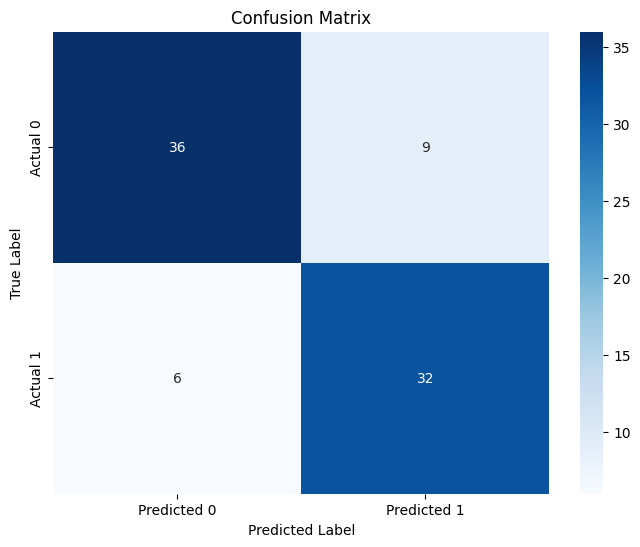

In [ ]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Save the model to your Google Drive
model.save('/content/drive/My Drive/w1810216_FYP_20200351_UAPSithmini/w1810216_transformer_model/my_model.h5')


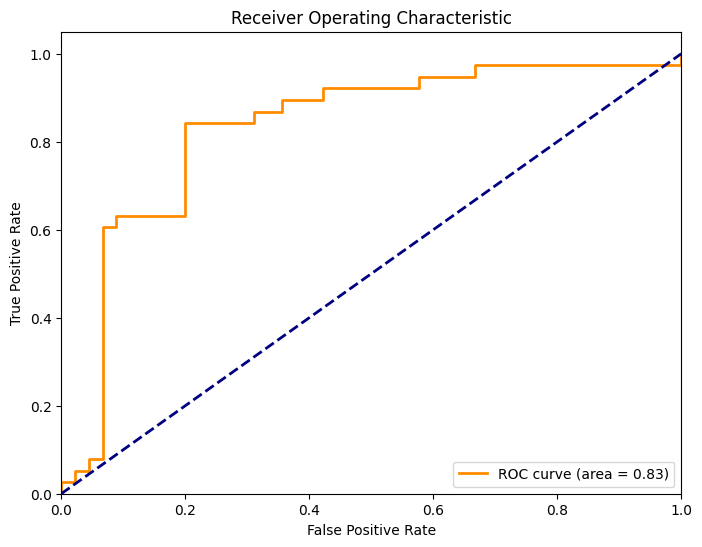

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


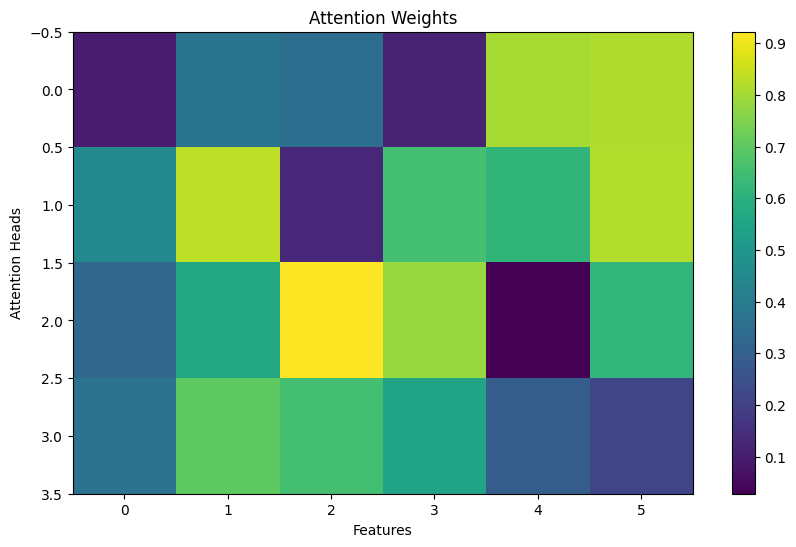

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get attention weights from the model (requires modifications to the model definition)
# This is a placeholder; you'll need to adapt it to your specific model architecture
def get_attention_weights(model, inputs):
    # Access the attention weights from the attention layers
    # This will depend on how you've defined your model and attention layers
    # Example: Assuming you have access to the attention weights directly
    # attention_weights = model.layers[2].get_weights()[0]  # Replace with actual layer index
    # ... your code to extract attention weights ...
    # For demonstration, we'll create some dummy attention weights
    attention_weights = np.random.rand(inputs.shape[0], 4, 1, 6)  # Example shape
    return attention_weights

# Example usage: Get attention weights for the first sample in the test set
attention_weights = get_attention_weights(model, X_test[:1])

# Plot the attention weights
plt.figure(figsize=(10, 6))
plt.imshow(attention_weights[0].squeeze(), cmap='viridis', aspect='auto')
plt.xlabel("Features")
plt.ylabel("Attention Heads")
plt.title("Attention Weights")
plt.colorbar()
plt.show()